In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
btc = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2017, 1, 1), end=datetime.datetime(2017, 12, 27))

In [4]:
btc.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,959.039978,965.469971,942.400024,963.380005,963.380005,26379401
2017-01-01,963.380005,1001.609985,956.099976,995.440002,995.440002,40570922
2017-01-02,995.440002,1031.680054,990.200012,1017.049988,1017.049988,66038073
2017-01-03,1017.049988,1035.469971,1006.530029,1033.300049,1033.300049,56085870
2017-01-04,1033.300049,1148.540039,1022.320007,1135.410034,1135.410034,170584623
2017-01-05,1135.410034,1150.630005,874.530029,989.349976,989.349976,244839289
2017-01-06,989.349976,1027.420044,852.549988,886.159973,886.159973,179160668
2017-01-07,886.159973,900.859985,806.659973,888.869995,888.869995,113037531
2017-01-08,888.869995,936.130005,875.849976,900.859985,900.859985,70298340


In [5]:
eth = web.get_data_yahoo('ETH-USD', start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2018, 2, 27))

In [6]:
eth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-23,804.609985,882.419983,787.969971,854.700012,854.700012,340134173
2018-02-24,854.700012,874.719971,810.640015,833.489990,833.489990,255866976
2018-02-25,833.489990,849.520020,818.549988,840.280029,840.280029,171228507
2018-02-26,840.280029,880.119995,834.059998,867.619995,867.619995,247282448
2018-02-27,867.619995,894.919983,861.719971,871.580017,871.580017,201082786


In [7]:
btc_adj = btc['Adj Close']

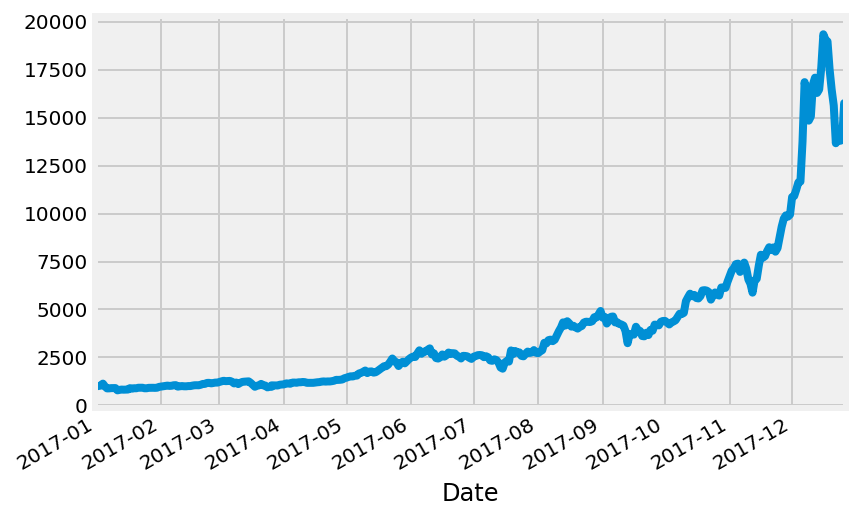

In [8]:
btc_adj.plot()
plt.show()

In [9]:
short_window = 10
mid_window = 50

signals = pd.DataFrame(index=btc_adj.index)
signals['signal'] = 0.0

In [10]:
signals.head()

,signal
Date,
2016-12-31,0.0
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0


In [11]:
roll_d10 = btc_adj.rolling(window=short_window).mean()
roll_d50 = btc_adj.rolling(window=mid_window).mean()

signals['short_mavg'] = roll_d10
signals['mid_mavg'] = roll_d50

In [12]:
signals.head()

,signal,short_mavg,mid_mavg
Date,,,
2016-12-31,0.0,NaN,NaN
2017-01-01,0.0,NaN,NaN
2017-01-02,0.0,NaN,NaN
2017-01-03,0.0,NaN,NaN
2017-01-04,0.0,NaN,NaN


In [13]:
signals.head(20)

,signal,short_mavg,mid_mavg
Date,,,
2016-12-31,0.0,NaN,NaN
2017-01-01,0.0,NaN,NaN
2017-01-02,0.0,NaN,NaN
2017-01-03,0.0,NaN,NaN
2017-01-04,0.0,NaN,NaN
2017-01-05,0.0,NaN,NaN
2017-01-06,0.0,NaN,NaN
2017-01-07,0.0,NaN,NaN
2017-01-08,0.0,NaN,NaN


In [14]:
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

In [15]:
signals['positions'].head(10)

Date
2016-12-31    NaN
2017-01-01    0.0
2017-01-02    0.0
2017-01-03    0.0
2017-01-04    0.0
2017-01-05    0.0
2017-01-06    0.0
2017-01-07    0.0
2017-01-08    0.0
2017-01-09    0.0
Name: positions, dtype: float64

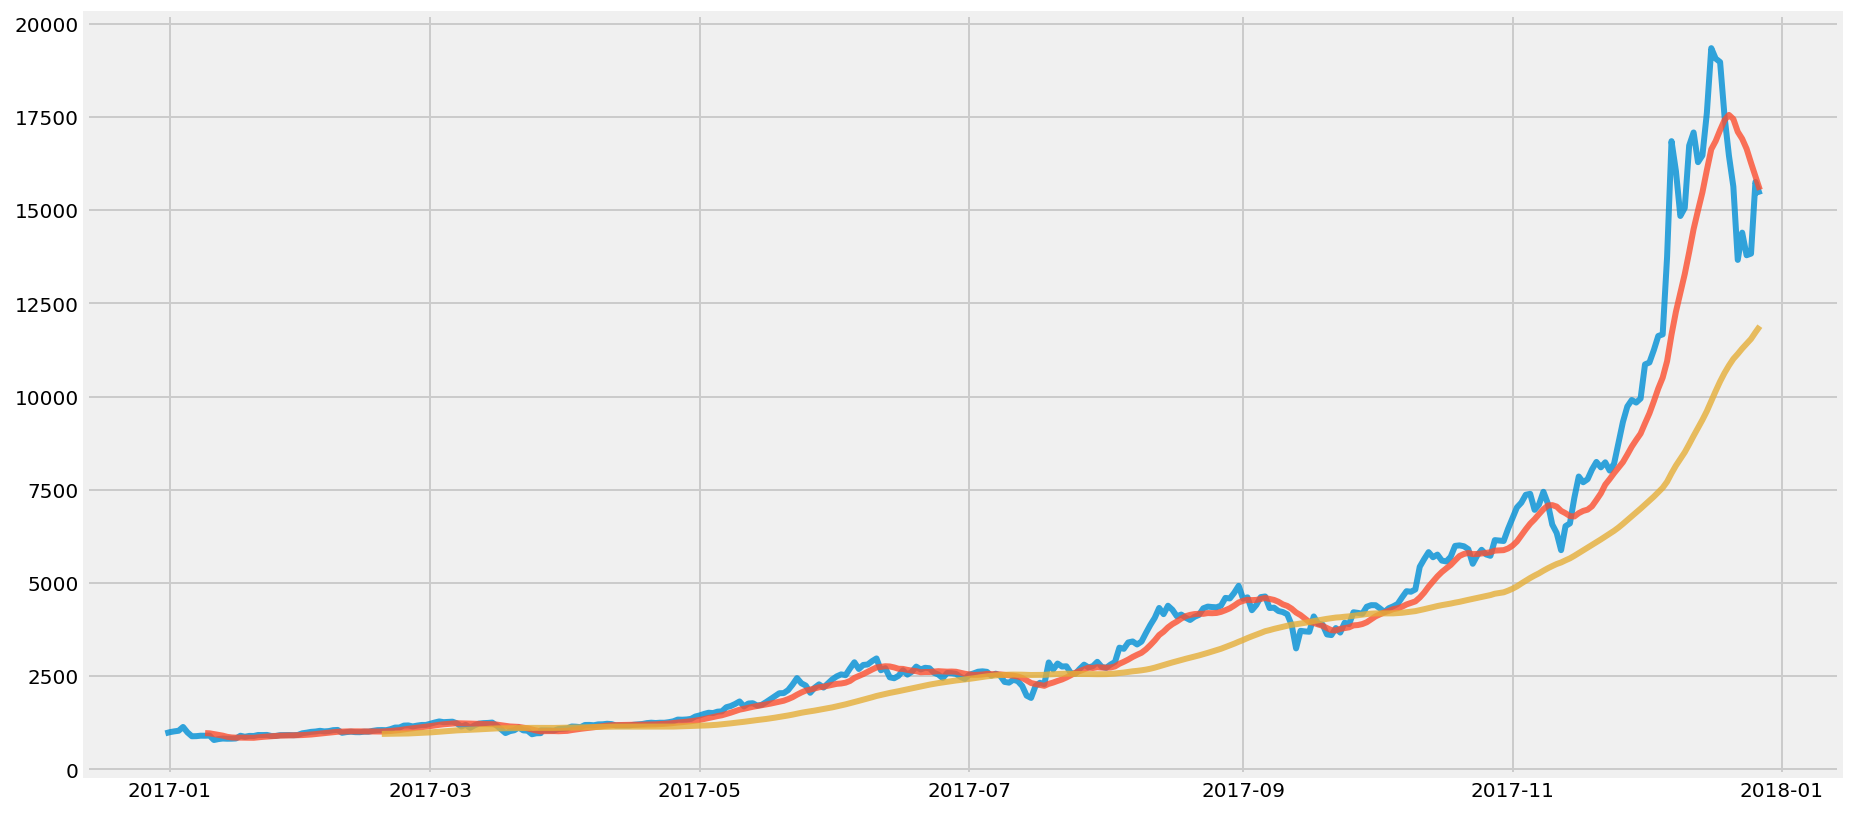

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(btc_adj.index, btc_adj, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_adj.index, roll_d10, lw=3, alpha=0.8,label='Rolling mean (window 10)')
plt.plot(btc_adj.index, roll_d50, lw=3, alpha=0.8,label='Rolling mean (window 50)')

# plt.plot(signals.loc[signals.positions == 1.0].index, 
#          signals.short_mavg[signals.positions == 1.0],
#          '^', markersize=10, color='r', label='buy')
         
# plt.plot(signals.loc[signals.positions == -1.0].index, 
#          signals.short_mavg[signals.positions == -1.0],
#          'v', markersize=10, color='k', label='sell')



In [20]:
signals.loc[signals.positions == 1.0].index

DatetimeIndex(['2017-02-18', '2017-04-08', '2017-07-25', '2017-10-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
#  signals.short_mavg[signals.positions == -1.0]

In [25]:
signals.loc[signals.positions == 1.0]

,signal,short_mavg,mid_mavg,positions
Date,,,,
2017-02-18,1.0,1012.692017,949.349205,1.0
2017-04-08,1.0,1144.614001,1135.751801,1.0
2017-07-25,1.0,2587.565015,2556.686621,1.0
2017-10-03,1.0,4210.404028,4182.372612,1.0


In [31]:

list(signals.loc[signals['positions'] == 1.0, 'short_mavg'])

[1012.6920165000001, 1144.6140014000005, 2587.5650146, 4210.404028199999]

In [32]:
signals.loc[signals['positions'] == 1.0, 'short_mavg']

Date
2017-02-18    1012.692017
2017-04-08    1144.614001
2017-07-25    2587.565015
2017-10-03    4210.404028
Name: short_mavg, dtype: float64

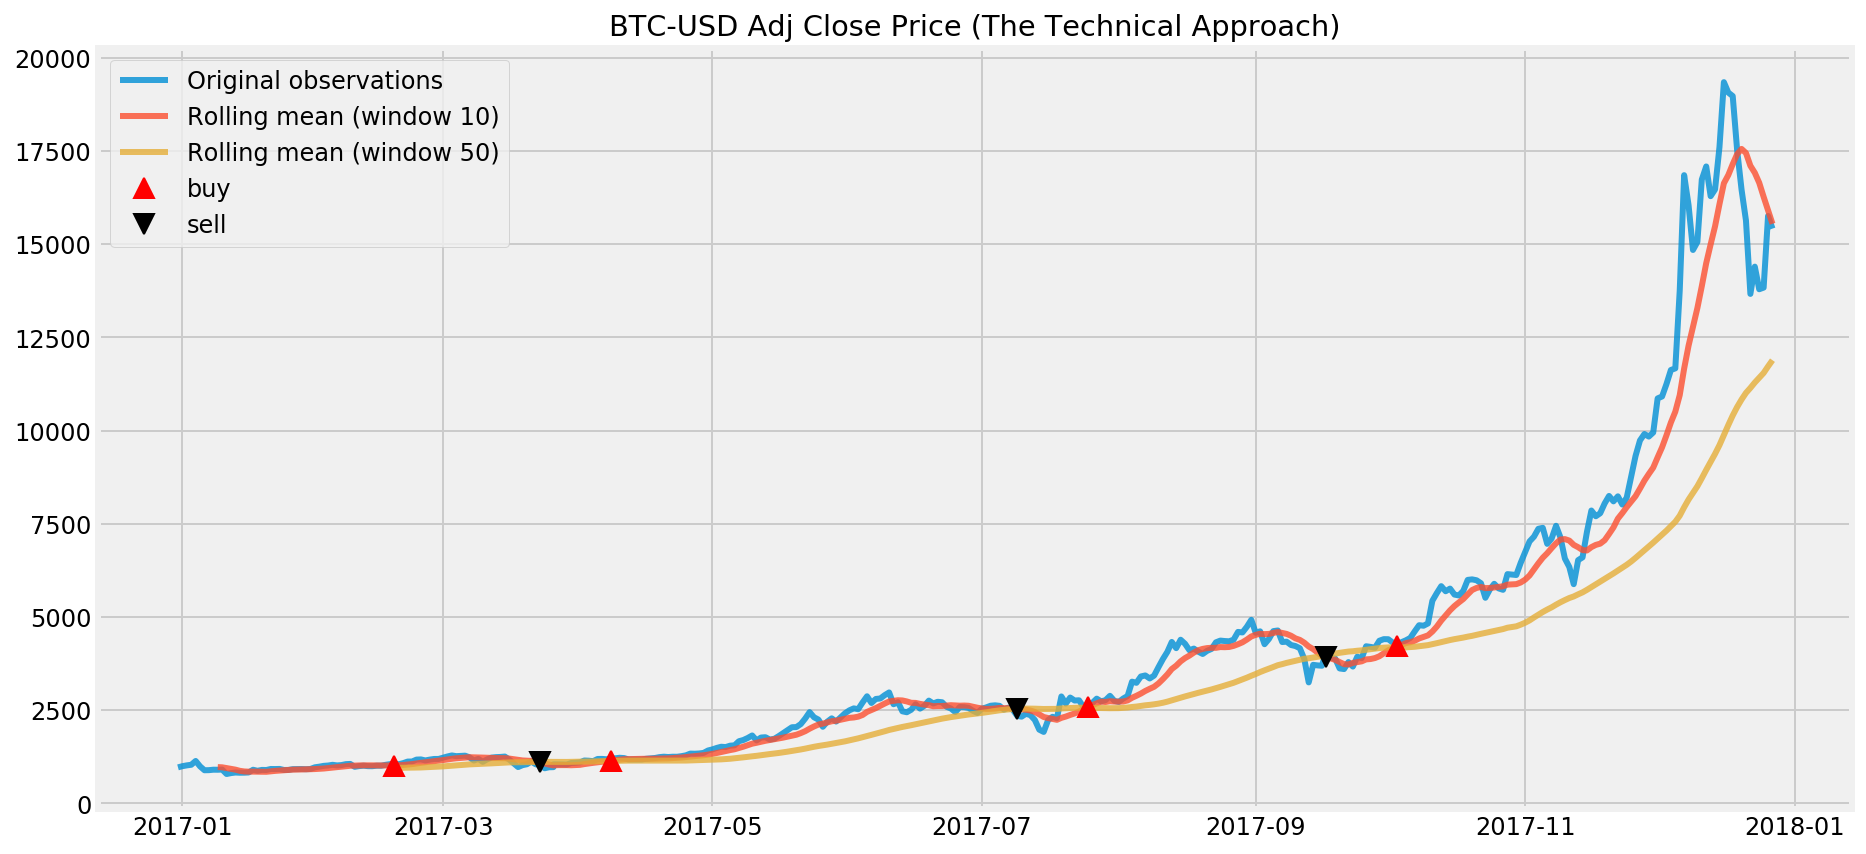

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(btc_adj.index, btc_adj, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_adj.index, roll_d10, lw=3, alpha=0.8,label='Rolling mean (window 10)')
plt.plot(btc_adj.index, roll_d50, lw=3, alpha=0.8,label='Rolling mean (window 50)')

plt.plot(signals.loc[signals.positions == 1.0].index, 
         list(signals.loc[signals['positions'] == 1.0, 'short_mavg']),
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         list(signals.loc[signals['positions'] == -1.0, 'short_mavg']),
         'v', markersize=10, color='k', label='sell')

plt.title('BTC-USD Adj Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [33]:
initial_investment = btc_adj.loc[list(signals[signals.positions == 1.0].index)][0]

In [34]:
initial_investment

1052.280029

In [35]:
list(signals[signals.positions == 1.0].index)

[Timestamp('2017-02-18 00:00:00'),
 Timestamp('2017-04-08 00:00:00'),
 Timestamp('2017-07-25 00:00:00'),
 Timestamp('2017-10-03 00:00:00')]

In [36]:
list(signals[signals.positions == 1.0].index)[0]

Timestamp('2017-02-18 00:00:00')

In [37]:
bought = np.sum(btc_adj.loc[list(signals[signals.positions == 1.0].index)]*-1.0)

In [38]:
bought

-9034.490112

In [41]:
btc_adj.loc[list(signals[signals.positions == 1.0].index)]

Date
2017-02-18    1052.280029
2017-04-08    1204.339966
2017-07-25    2559.209961
2017-10-03    4218.660156
Name: Adj Close, dtype: float64

In [43]:
list(signals[signals.positions == 1.0].index)[-1]

Timestamp('2017-10-03 00:00:00')

In [44]:
bought = np.sum(btc_adj.loc[list(signals[signals.positions == 1.0].index)]*-1.0)
sold = np.sum(btc_adj.loc[list(signals[signals.positions == -1.0].index)])
current_value = btc_adj[-1]

balance = pd.DataFrame([btc_adj.loc[list(signals[signals.positions == 1.0].index)]*-1.0,
              btc_adj.loc[list(signals[signals.positions == -1.0].index)]]).transpose()

In [45]:
balance.head()

,Adj Close,Adj Close
Date,,
2017-02-18,-1052.280029,NaN
2017-03-23,NaN,1035.030029
2017-04-08,-1204.339966,NaN
2017-07-09,NaN,2344.020020
2017-07-25,-2559.209961,NaN


In [56]:
balance = balance.fillna(0)

In [57]:
balance

,Adj Close,Adj Close
Date,,
2017-02-18,-1052.280029,0.000000
2017-03-23,0.000000,1035.030029
2017-04-08,-1204.339966,0.000000
2017-07-09,0.000000,2344.020020
2017-07-25,-2559.209961,0.000000
2017-09-17,0.000000,4100.279785
2017-10-03,-4218.660156,0.000000
